In [140]:
# Import library yang akan dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
# Ambil data dari Kaggle.com
import kagglehub

spotify = kagglehub.dataset_download("pepepython/spotify-huge-database-daily-charts-over-3-years")

print(spotify)

In [ ]:
# Buat dataframe dari data source
import pandas as pd

df = pd.read_csv("C:\\Users\\rafli\\.cache\\kagglehub\\datasets\\pepepython\\spotify-huge-database-daily-charts-over-3-years\\versions\\1\\Database to calculate popularity.csv", index_col = 0)

In [ ]:
df.head()

,country,date,position,uri,track,title,artist
0,Global,05/11/2020,1.0,https://open.spotify.com/track/47EiUVwUp4C9fGc...,"Dakiti , Bad Bunny, Jhay Cortez",Dakiti,"Bad Bunny, Jhay Cortez"
1,Global,05/11/2020,2.0,https://open.spotify.com/track/35mvY5S1H3J2QZy...,"positions , Ariana Grande",positions,Ariana Grande
2,Global,05/11/2020,3.0,https://open.spotify.com/track/3tjFYV6RSFtuktY...,"Mood , 24kGoldn",Mood,24kGoldn
3,Global,05/11/2020,4.0,https://open.spotify.com/track/7hxHWCCAIIxFLCz...,"Lemonade , Internet Money",Lemonade,Internet Money
4,Global,05/11/2020,5.0,https://open.spotify.com/track/4y4spB9m0Q6026K...,"Lonely , Justin Bieber",Lonely,Justin Bieber


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9807001 entries, 0 to 9807000
Data columns (total 7 columns):
 #   Column    Dtype  
---  ------    -----  
 0   country   object 
 1   date      object 
 2   position  float64
 3   uri       object 
 4   track     object 
 5   title     object 
 6   artist    object 
dtypes: float64(1), object(6)
memory usage: 598.6+ MB


In [ ]:
df['country'].unique() # Mengetahui daftar negara

array(['Global', 'USA', 'UK', 'Argentina', 'Austria', 'Australia',
       'Belgium', 'Brazil', 'Canada', 'Switzerland', 'Chile', 'Colombia',
       'Costa Rica', 'Germany', 'Denmark', 'Ecuador', 'Spain', 'Finland',
       'France', 'Indonesia', 'Ireland', 'Italy', 'Mexico', 'Malaysia',
       'Netherlands', 'Norway', 'New Zealand', 'Peru', 'Philippines',
       'Poland', 'Portugal', 'Sweden', 'Singapore', 'Turkey', 'Taiwan'],
      dtype=object)

In [348]:
df['position'].unique() # mengetahui peringkat awal hingga akhir (1-200)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [21]:
df.isnull().sum()

country     0
date        0
position    0
uri         0
track       0
title       0
artist      0
dtype: int64

In [ ]:
df[df['country'].isnull()]
df = df.dropna() # Menghapus kolom missing values

In [26]:
#Mengubah data type kolom POSITION dari float ke Int
df['position'] = df['position'].astype(int)

#Mengubah data type kolom DATE dari object ke Date
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9791359 entries, 0 to 9806999
Data columns (total 7 columns):
 #   Column    Dtype         
---  ------    -----         
 0   country   object        
 1   date      datetime64[ns]
 2   position  int64         
 3   uri       object        
 4   track     object        
 5   title     object        
 6   artist    object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 597.6+ MB


In [349]:
df.duplicated().sum() # Memeriksa apakah ada data yang terduplikat

np.int64(0)

# Analisis Top Charts Lagu di Indonesia di tahun 2020

In [ ]:
# Mengambil Data Spotify Daily Charts di Negara Indonesia
df_indo = df[df['country'] == 'Indonesia']

# Menghapus Kolom Country
df_indo.drop(columns='country', inplace = True)

In [39]:
df_indo

,date,position,uri,track,title,artist
5323800,2020-11-05,1,https://open.spotify.com/track/0ZEYRVISCaqz5ya...,"Melukis Senja , Budi Doremi",Melukis Senja,Budi Doremi
5323801,2020-11-05,2,https://open.spotify.com/track/5QGdWvXwXMK2Zx6...,Sudah - Story of Kale - Original Motion Pictu...,Sudah - Story of Kale - Original Motion Pictu...,Ardhito Pramono
5323802,2020-11-05,3,https://open.spotify.com/track/0t1kP63rueHleOh...,"Dynamite , BTS",Dynamite,BTS
5323803,2020-11-05,4,https://open.spotify.com/track/7B3z0ySL9Rr0XvZ...,"Sofia , Clairo",Sofia,Clairo
5323804,2020-11-05,5,https://open.spotify.com/track/4sCabvmZpbmfoCN...,"Cuek , Rizky Febian",Cuek,Rizky Febian
...,...,...,...,...,...,...
5603995,2017-01-01,196,https://open.spotify.com/track/4Jk6fZmX3gGYYbH...,"In My Room , Yellow Claw, Mustard",In My Room,"Yellow Claw, Mustard"
5603996,2017-01-01,197,https://open.spotify.com/track/7y86okbUKyAxsfu...,"Menghapus Jejakmu , Peterpan",Menghapus Jejakmu,Peterpan
5603997,2017-01-01,198,https://open.spotify.com/track/4DX8Ejmm8dMRklW...,"Selamanya Cinta , D'Cinnamons",Selamanya Cinta,D'Cinnamons
5603998,2017-01-01,199,https://open.spotify.com/track/1artwGqCjSKoPo1...,"Dahulu , GAC",Dahulu,GAC


In [41]:
df_indo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279990 entries, 5323800 to 5603999
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   date      279990 non-null  datetime64[ns]
 1   position  279990 non-null  int64         
 2   uri       279990 non-null  object        
 3   track     279990 non-null  object        
 4   title     279990 non-null  object        
 5   artist    279990 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 15.0+ MB


In [ ]:
# Mengambil data spotify trend di Indonesia di tahun 2020 saja 
indo_2020 = df_indo[(df_indo['date'] >= '2020-01-01') & (df_indo['date'] <= '2020-11-05')]

In [113]:
indo_2020.head()

,date,position,uri,track,title,artist
5323800,2020-11-05,1,https://open.spotify.com/track/0ZEYRVISCaqz5ya...,"Melukis Senja , Budi Doremi",Melukis Senja,Budi Doremi
5323801,2020-11-05,2,https://open.spotify.com/track/5QGdWvXwXMK2Zx6...,Sudah - Story of Kale - Original Motion Pictur...,Sudah - Story of Kale - Original Motion Pictur...,Ardhito Pramono
5323802,2020-11-05,3,https://open.spotify.com/track/0t1kP63rueHleOh...,"Dynamite , BTS",Dynamite,BTS
5323803,2020-11-05,4,https://open.spotify.com/track/7B3z0ySL9Rr0XvZ...,"Sofia , Clairo",Sofia,Clairo
5323804,2020-11-05,5,https://open.spotify.com/track/4sCabvmZpbmfoCN...,"Cuek , Rizky Febian",Cuek,Rizky Febian


In [ ]:
# Menghapus White Space
indo_2020[['track', 'title', 'artist']] = indo_2020[['track', 'title', 'artist']].apply(lambda x: x.str.strip())

# Analisis Top 10 Artis dengan Hari Kumulatif Terbanyak di Chart Musik Indonesia 2020

Kode berikut memproses data untuk menghasilkan visualisasi bar chart dari 10 artis dengan hari kumulatif terbanyak di chart musik.

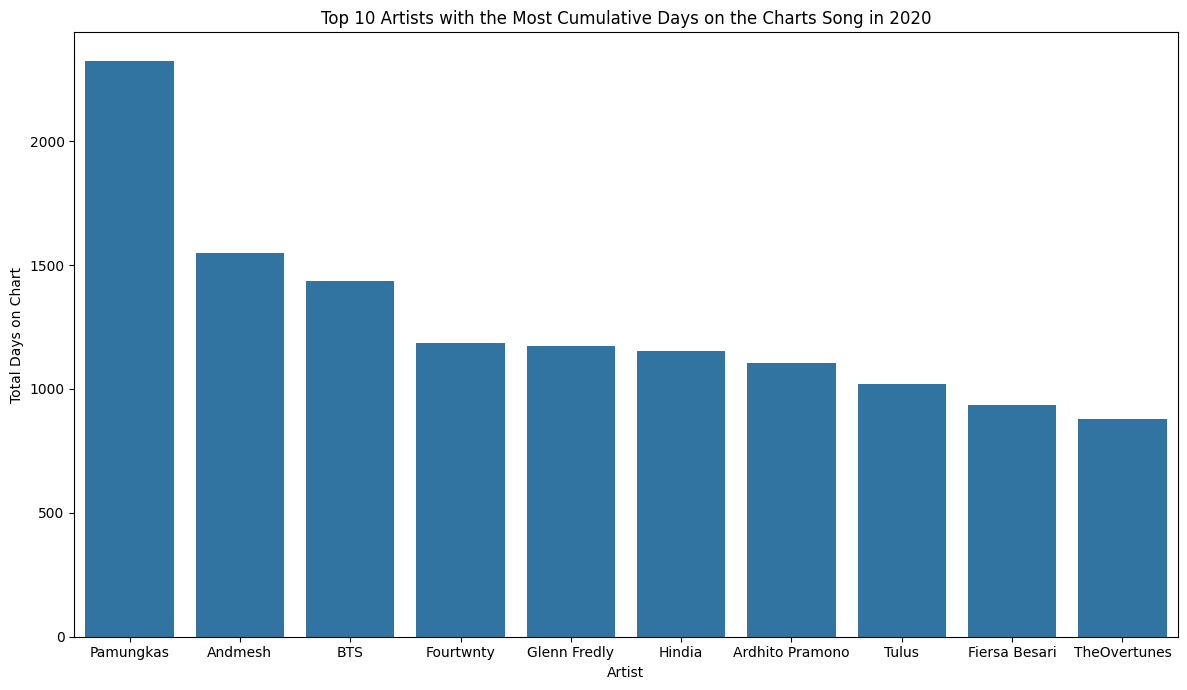

In [ ]:
# Top 10 Artis dengan Lagu yang Sering Masuk Leaderboard 
top10_artist = indo_2020['artist'].value_counts().reset_index()
top10_artist.columns = ['Artist', 'Total Days']
top10_artist = top10_artist.head(10)

plt.figure(figsize=(12,7))
sns.barplot(data = top10_artist, x = 'Artist', y = 'Total Days')
plt.title("Top 10 Artists with the Most Cumulative Days on the Charts Song in 2020")
plt.xlabel("Artist")
plt.ylabel("Total Days on Chart")
plt.tight_layout()

# Analisis Top 5 Lagu Pamungkas Paling Populer di Chart Musik Indonesia 2020

Kode berikut memproses data untuk menghasilkan visualisasi bar chart dari 5 Lagu Pamungkas paling poluler.

In [260]:
pamungkas = indo_2020[indo_2020['artist'] == "Pamungkas"].reset_index()
pamungkas

,index,date,position,uri,track,title,artist
0,5323822,2020-11-05,23,https://open.spotify.com/track/7iTF9T1jum3Km6H...,"One Only , Pamungkas",One Only,Pamungkas
1,5323828,2020-11-05,29,https://open.spotify.com/track/1tS1dRfxIV9Fzqd...,"Kenangan Manis , Pamungkas",Kenangan Manis,Pamungkas
2,5323832,2020-11-05,33,https://open.spotify.com/track/77vx7sGjdqwdnQL...,"Monolog , Pamungkas",Monolog,Pamungkas
3,5323846,2020-11-05,47,https://open.spotify.com/track/01beCqR9wsVnwzk...,"I Love You but I'm Letting Go , Pamungkas",I Love You but I'm Letting Go,Pamungkas
4,5323852,2020-11-05,53,https://open.spotify.com/track/3XJ9dvjhpxh49Py...,"Closure , Pamungkas",Closure,Pamungkas
...,...,...,...,...,...,...,...
2318,5385635,2020-01-01,36,https://open.spotify.com/track/1tS1dRfxIV9Fzqd...,"Kenangan Manis , Pamungkas",Kenangan Manis,Pamungkas
2319,5385638,2020-01-01,39,https://open.spotify.com/track/01beCqR9wsVnwzk...,"I Love You but I'm Letting Go , Pamungkas",I Love You but I'm Letting Go,Pamungkas
2320,5385654,2020-01-01,55,https://open.spotify.com/track/4gW0fnArZ93uAEl...,"Sorry , Pamungkas",Sorry,Pamungkas
2321,5385753,2020-01-01,154,https://open.spotify.com/track/5thYdqTZJZFtzSR...,"Wait a Minute , Pamungkas",Wait a Minute,Pamungkas


In [276]:
pamungkas_position = pamungkas[pamungkas['title'].isin(['One Only', 'Sorry', 'Kenangan Manis', "I Love You but I'm Letting Go", 'To the Bone'])]
pamungkas_position = pamungkas_position.groupby('title')['position'].sum().reset_index()
pamungkas_position.sort_values('position', ascending=True, inplace=True)
pamungkas_position

,title,position
2,One Only,4690
1,Kenangan Manis,8427
0,I Love You but I'm Letting Go,11656
3,Sorry,24056
4,To the Bone,40168


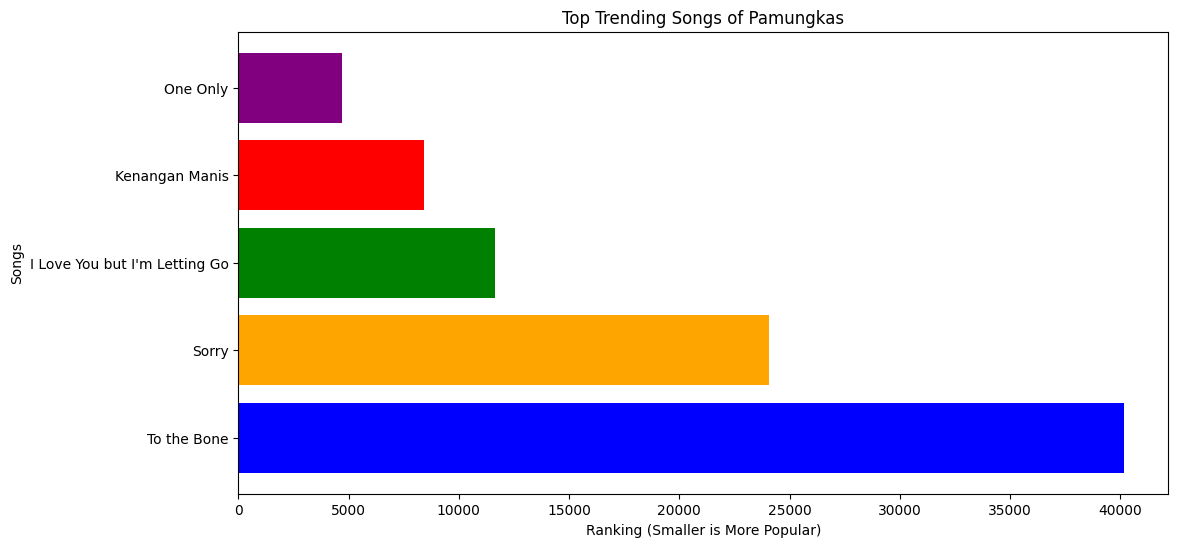

In [ ]:
# Visualisasi Lagu Pamungkas paling Hits
plt.figure(figsize=(12, 6))
plt.barh(pamungkas_position['title'], pamungkas_position['position'], 
         color=['purple', 'red', 'green', 'orange', 'blue'])
plt.xlabel('Ranking (Smaller is More Popular)')
plt.ylabel('Songs')
plt.title('Top Trending Songs of Pamungkas')
plt.gca().invert_yaxis()

plt.show()

### Dari Visualisasi Diatas, Dapat Dilihat Bahwa Lagu Pamungkas Yang Berjudul "ONE ONLY" Menjadi Lagu Yang Paling Populer Dari Lagu Pamungkas Yang Lainnya. 

Sekarang, mari melihat peringkat lagu "One Only" sepanjang tahun 2020

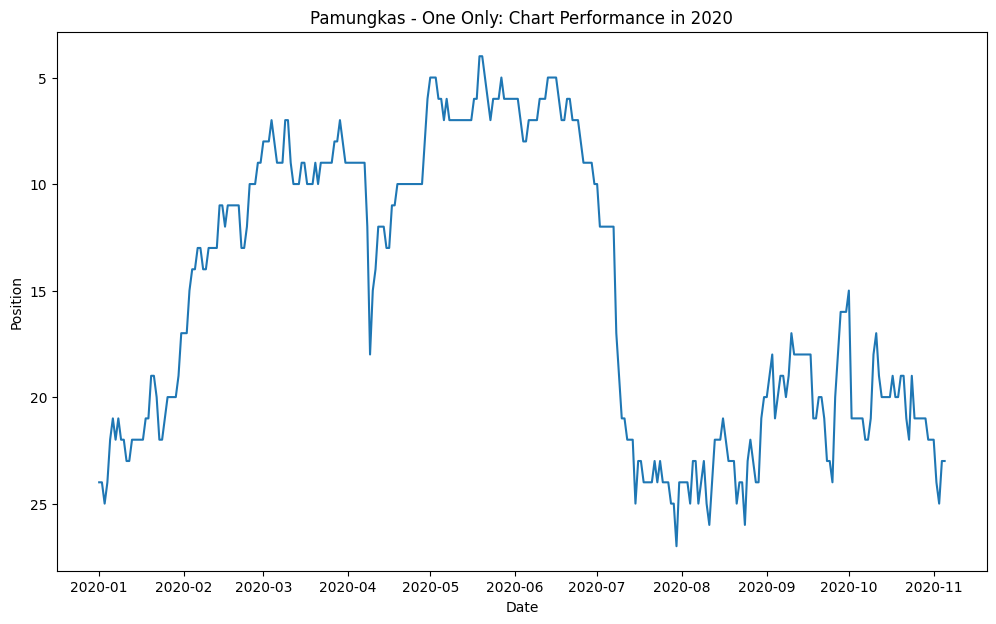

In [254]:
# Melihat perkembangan tren lagu Pamungkas - One Only sepamjang tahun 2020
one_only = indo_2020[['date', 'title', 'position']]
one_only = one_only[one_only['title'] == 'One Only']
one_only.sort_values('date', ascending=True, inplace=True)

plt.figure(figsize=(12,7))
sns.lineplot(data=one_only,
             x='date',
             y='position')

plt.title("Pamungkas - One Only: Chart Performance in 2020")
plt.xlabel("Date")
plt.ylabel("Position")
plt.gca().invert_yaxis()
plt.show()

Dilihat dari hasilnya, lagu One only mendapatkan peringkat terbaik dari bulan Maret hingga Juni 2020. Namun ditengah itu, pada bulan April, lagu One Only sempat turun peringkat. Performa lagu One Only makin menurun dari bulan Juli 2020, menandakan lagu One Only ini telah berkurang dari segi popularitas di spotify, dan bisa jadi ada faktor lagu lain yang lebih populer

# Lagu Paling Populer Sepanjang Tahun 2020

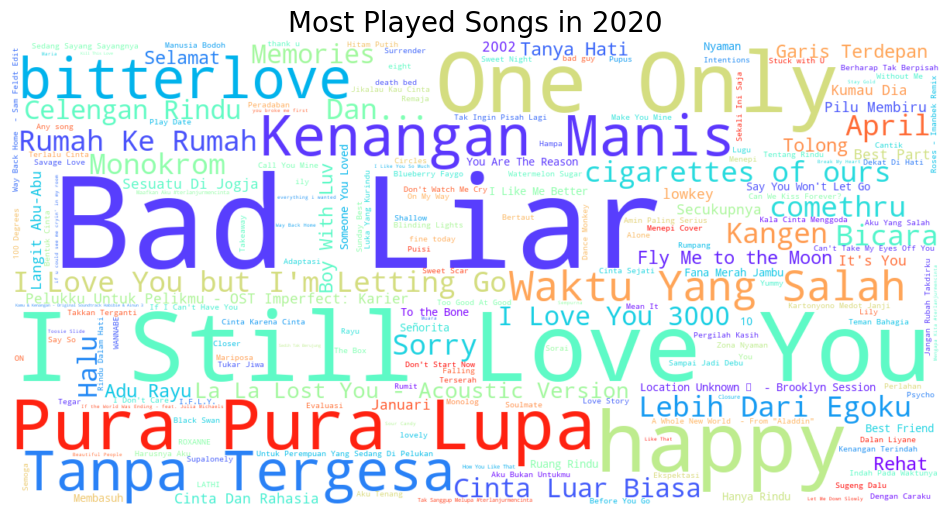

In [170]:
# Membuat wordcloud untuk judul lagu yang paling populer

from wordcloud import WordCloud, STOPWORDS

title_wc = indo_2020['title'].value_counts()

wordcloud = WordCloud(width=1200, height=600, background_color="white", colormap="rainbow",  contour_width=1, contour_color='black').generate_from_frequencies(title_wc)

plt.figure(figsize=(12, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Played Songs in 2020", fontsize=20)
plt.show()

Lagu "Bad Liar" dari Imagine Dragons mendominasi sebagai lagu paling populer tahun 2020, diikuti oleh lagu "I Still Love You" dari The Overtunes, "Pura Pura Lupa" dari Mahen, dan "One Only" karya Pamungkas, dan "Kenangan Manis" yang menunjukkan preferensi pendengar Indonesia terhadap musik pop dengan tema percintaan. Word cloud ini memperlihatkan perpaduan lagu berbahasa Indonesia dan Inggris yang populer sepanjang 2020, dengan dominasi lagu-lagu bertema cinta dan kenangan yang menjadi favorit pendengar musik di Indonesia di tahun 2020.

# 10 Artis/Group Band dengan Jumlah Lagu Paling Banyak di Top Charts Indonesia 2020 

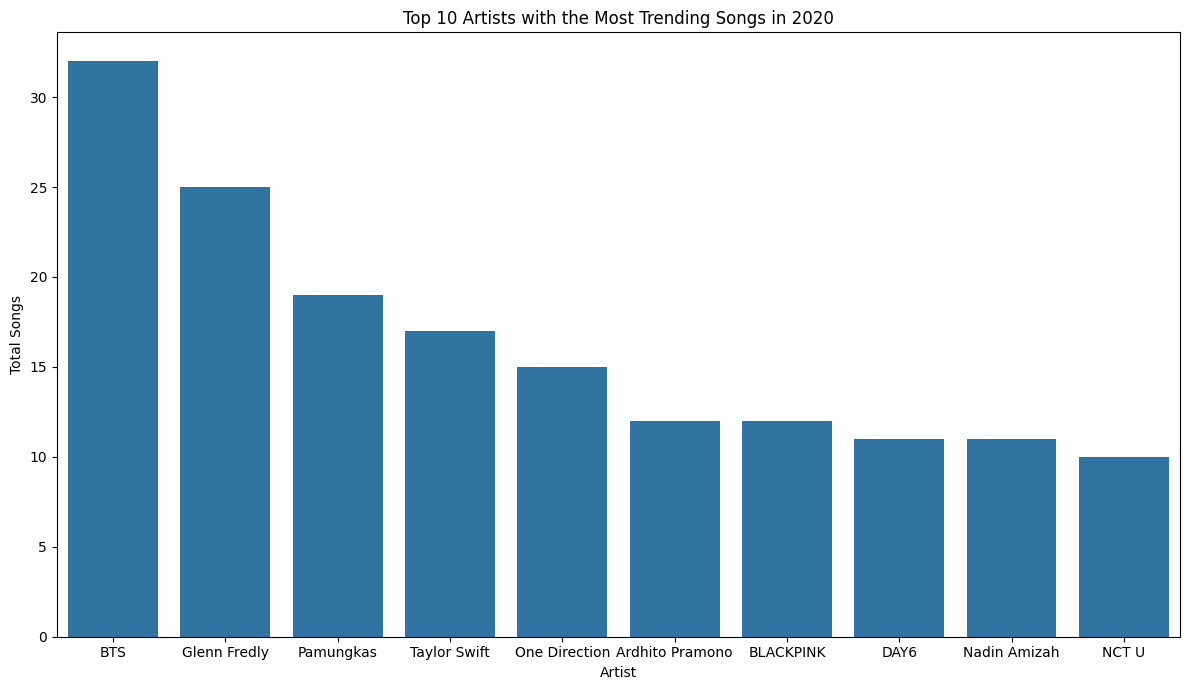

In [255]:
# Membuat dataframe tanpa adanya  judul lagu yang sama / berulang
duplicates_2020 = indo_2020.drop_duplicates(subset=['title'], keep='first')
artist = duplicates_2020['artist'].value_counts().reset_index()
artist = artist.head(10)

# 10 Artis dengan jumlah Lagu yang Sering Diputar di 2020
plt.figure(figsize=(12,7))
sns.barplot(data = artist, x = 'artist', y = 'count')
plt.title("Top 10 Artists with the Most Trending Songs in 2020")
plt.xlabel("Artist")
plt.ylabel("Total Songs")
plt.tight_layout()

BTS mendominasi dengan lagu trending paling banyak, diikuti Glenn Fredly dan Pamungkas, sementara artis internasional Taylor Swift, One Direction, NCT U, DAY6 dan BLACKPINK bersaing dengan artis Indonesia Ardhito Pramono, dan Nadin Amizah, yang melengkapi 10 besar.

# TOP 5 Lagu BTS Paling Populer

Mencari 5 lagu teratas BTS paling poluler

In [ ]:
bts = indo_2020[indo_2020['artist'] == "BTS"]
bts['title'].value_counts() # Menghitung judul lagu paling populer

In [340]:
top_5_bts = bts[bts['title'].isin(["Boy With Luv", "ON", "Black Swan", "Stay Gold", "Dynamite"])].reset_index(drop=True) # Mengambil lagu paling populer
top_5_bts.sort_values('position', ascending=True, inplace=True)

In [343]:
top_5_bts

,date,position,uri,track,title,artist
270,2020-08-22,1,https://open.spotify.com/track/0v1x6rN6JHRapa0...,"Dynamite , BTS",Dynamite,BTS
275,2020-08-21,1,https://open.spotify.com/track/0v1x6rN6JHRapa0...,"Dynamite , BTS",Dynamite,BTS
260,2020-08-24,1,https://open.spotify.com/track/0v1x6rN6JHRapa0...,"Dynamite , BTS",Dynamite,BTS
265,2020-08-23,1,https://open.spotify.com/track/0v1x6rN6JHRapa0...,"Dynamite , BTS",Dynamite,BTS
240,2020-08-28,1,https://open.spotify.com/track/0v1x6rN6JHRapa0...,"Dynamite , BTS",Dynamite,BTS
...,...,...,...,...,...,...
38,2020-10-19,199,https://open.spotify.com/track/3Ys2PYl1wyPKQIw...,"Stay Gold , BTS",Stay Gold,BTS
469,2020-06-21,199,https://open.spotify.com/track/3bkkMZEAhx7rTVz...,"Black Swan , BTS",Black Swan,BTS
45,2020-10-17,199,https://open.spotify.com/track/3Ys2PYl1wyPKQIw...,"Stay Gold , BTS",Stay Gold,BTS
71,2020-10-10,200,https://open.spotify.com/track/3Ys2PYl1wyPKQIw...,"Stay Gold , BTS",Stay Gold,BTS


In [342]:
bts_best_5 = top_5_bts.drop_duplicates(subset='title', keep="first")
bts_best_5

,date,position,uri,track,title,artist
270,2020-08-22,1,https://open.spotify.com/track/0v1x6rN6JHRapa0...,"Dynamite , BTS",Dynamite,BTS
474,2020-06-19,1,https://open.spotify.com/track/0UwQTbq7ZtBJ7v5...,"Stay Gold , BTS",Stay Gold,BTS
947,2020-01-17,4,https://open.spotify.com/track/24NuEDgyRIljwSy...,"Black Swan , BTS",Black Swan,BTS
871,2020-02-22,8,https://open.spotify.com/track/3IB5qOeMayvpOdH...,"ON , BTS",ON,BTS
948,2020-01-17,30,https://open.spotify.com/track/5KawlOMHjWeUjQt...,"Boy With Luv , BTS",Boy With Luv,BTS


Lagu yang berjudul "Dynamite" menjadi lagu BTS paling populer, diikuti oleh "Stay Gold", "Black Swan", "ON", dan "Boy With Luv"

# Peringkat Lagu Terbaik dari BTS "Dynamite" di tahun 2020

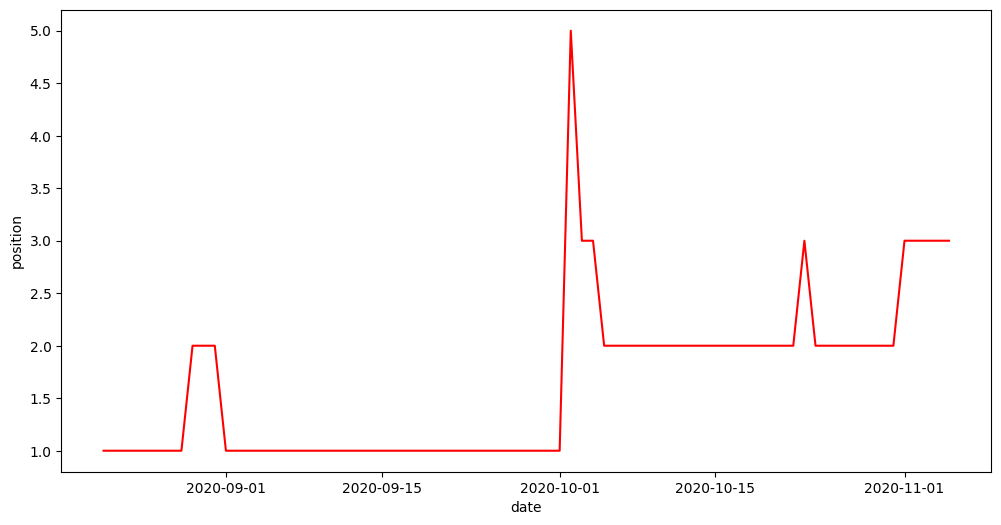

In [351]:
dynamite_bts = top_5_bts[top_5_bts['title'] == "Dynamite"]
dynamite_bts = dynamite_bts.sort_values('date', ascending=True)

plt.figure(figsize=(12,6))

ax1 = sns.lineplot(data=dynamite_bts,
             x = 'date',
             y='position',
             color = 'red',
             )

Lagu berjudul Dynamite rilis pada bulan 21 Agustus 2020, yang menandakan lagu Dynamite ini langsung menjadi peringkat atas sejak awal rilis lagu. Lagu Dynamite selalu menjadi top 5 lagu teratas di Indonesia